# DATA*6100 F22 Project 1


---
Diya Pancholi


In [ ]:
#installing extra libraries
!pip install ipython_autotime
!pip install kaggle

In [ ]:
#Downloading the dataset directly from kaggle 
#download kaggle.json from kaggle by generating API token
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c house-prices-advanced-regression-techniques --force
! unzip house-prices-advanced-regression-techniques.zip

# Executive Summary


---
### This project(implementing multiple linear regression) involves creating a model to predict housing prices using the Ames Housing dataset( Kaggle link: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques )

Initially both the data sets handed out, test and train are merged and initial modifications and analysis is performed. Data cleaning is implemented by imputing NULL values with appropriate imputations, i.e mean/median (for numerical) and mode (for categorical). Feature selection is performed to removefeatures with potential correlations,using VIF (variance inflation factor) and backward elimination. VIF is a technique used to detect multicollinearity between independent variables, so they can be removed from the final model. The data is then preprocessed by encoding categorical variables to be easily interpreted by the model. The data is then split into train and validation (test), to fit the model on train data and make predictions on the unseen test data, and eventually calculating the model metrics to evaluate model performance.
### Step-wise glance at the notebook:

1.   Importing required libraries  
2.   Downloading the datasets (train and test)
3.   Briefly exploring the train data 
4.   Handling missing values for categorical and numeric data respectively
5.   Encoding categorical values
6.   VIF for feature selection
7.   OLS regression results
8.   Fitting the Linear regression model
9.   Computing RMSE 
10.  Final kaggle submission
11.  References

 ( Detailed description included in each part of 'Detailed Report' )


### The top 4 submission scores that I achieved for my submissions are:

*   0.14857
*   0.14878
*   0.15011
*   0.19284




 


# Ethics Discussion


*   The results produced can help potential buyers to decide in which neighbourhood to invest in, considering a balance between price and convenience based on the amenities provided 
*   This dataset does not use any personal information that isn’t already publicly available. There is atmost autonomy and no breach of privacy
*   An ethical concern can be sudden spike in house prices which could affect potential home buyers. Pricing trends can be taken into account for the consumer's sake.



#Detailed report [ I ]

---


## I. Importing Required libraries


In [ ]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
%load_ext autotime


The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 8.82 ms (started: 2022-10-23 20:40:31 +00:00)


#Detailed Report [ II ]

---


## II. Loading the datasets
### The train and test sets are provided seperately, thus to generate a uniform dataset for both modelling and prediction, I first combined both datasets to apply modifications


In [ ]:
#Loading the train and test dataset 
train_data = pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

time: 67.1 ms (started: 2022-10-23 20:40:35 +00:00)


In [ ]:
print(train_data.shape)
print(test.shape)

(1460, 81)
(1459, 80)
time: 1.13 ms (started: 2022-10-23 20:40:36 +00:00)


In [ ]:
#combining the train and test data evaluation and further modeling
test_Id=test['Id']

train=train_data.append(test)

time: 24.6 ms (started: 2022-10-23 20:40:36 +00:00)


#Detailed Report [ III ] 

---





## III. Exploratory Data Analysis


*   data.shape() returns a tuple of the number of rows and columns in the data


    *   Train data contains 2919 rows and 70 columns


*   data.columns gives the list of column names
*   data.info() returns information like non-null count, datatypes of each column
*   data.describe() returns the statistical description of all columns of data
*   NaN values count for each column can be calculated using data.isna().sum() 


In [ ]:
print('Shape of train data - ',train.shape)
#train.columns

Shape of train data -  (2919, 81)
time: 898 µs (started: 2022-10-23 12:09:37 +00:00)


In [ ]:
#information about the data
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [ ]:
#statistical description of the data
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


time: 131 ms (started: 2022-10-09 21:29:23 +00:00)


In [ ]:
#statistical description of SalePrice 
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

time: 18.2 ms (started: 2022-10-09 21:29:23 +00:00)


In [ ]:
#distribution of SalePrice
px.histogram(train.SalePrice,marginal='box',title='Distribution of SalePrice')

time: 1.43 s (started: 2022-10-09 21:29:23 +00:00)


# Inference : Taking log(SalePrice) results in a normally distributed plot compared to the slightly right skewed plot of original SalePrice

> the outliers in the log(SalePrice) plot are more even than the first plot 

###Thus, based on this visualization, we can transform our target variable, SalePrice into its log values.



In [ ]:
#distribution of SalePrice
px.histogram(np.log(train.SalePrice),marginal='box',title='Distribution of log(SalePrice)')

time: 126 ms (started: 2022-10-09 21:29:25 +00:00)


In [ ]:
#scatter plot of saleprice v/s greater living area (sq feet)
px.scatter(train, x='SalePrice',y='GrLivArea',title='Sale price against living area (sq feet)')

time: 96.4 ms (started: 2022-10-09 21:29:25 +00:00)


# Inference : The scatter plot shows that the Sale price of the house increases as the sq feet living area increases, thus potraying a positive trend.

> Eventhough there are a few houses with a larger living area available at a cheaper rate.



Text(0.5, 1.0, 'Fig 3 Pairplot for relation between target sale price and predictors overall quality, garage area and sale condition ')

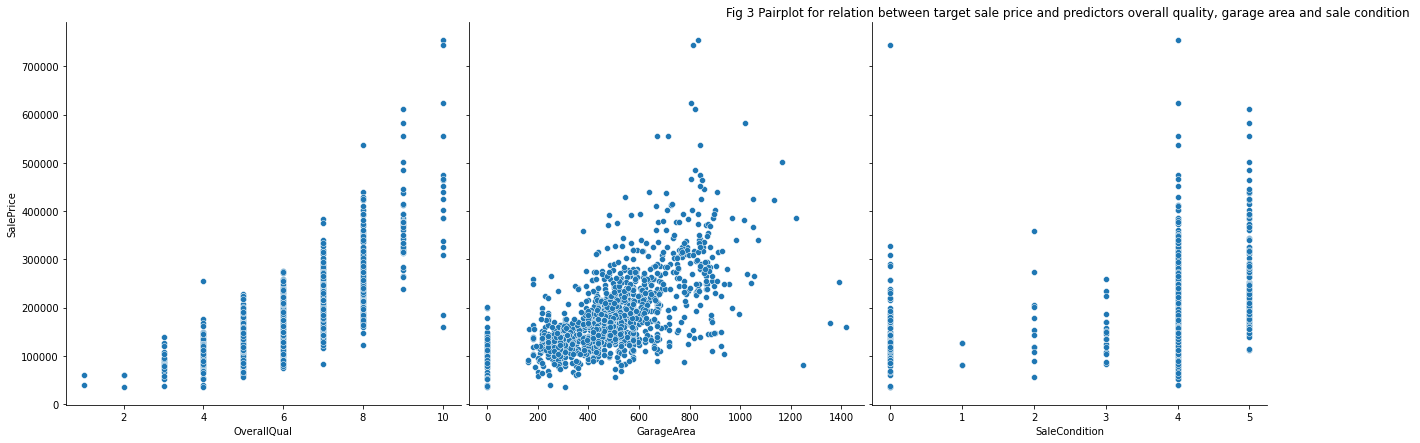

time: 809 ms (started: 2022-10-23 19:43:21 +00:00)


In [ ]:
#pairplot between the predictors overall quality, garage area and sale condition with SalePrice (target)
sb.pairplot(train, x_vars=['OverallQual','GarageArea','SaleCondition'],y_vars='SalePrice',height=6)
plt.title('Fig 3 Pairplot for relation between target sale price and predictors overall quality, garage area and sale condition ')


Figure 3 represents a pair plot that depicts relationship of features like overall quality (worst to best), garage area in square feet and sale condition with thet= target, sale price.
The sale price of better quality houses tends to be higher than low ones. 
More the area of garage, higher is the price, although there are a few outliers. Price of normal and partial sale conditions tends to be higher than others. 


# Detailed Report [IV]

---


## IV. Handling missing values
### To evaluate missing values efficiently, I created a dataframe containing NaN counts, % of missing values and datatype of only the columns containing NaN values in train data


In [ ]:
#Evaluating NULL values in the data
missing_values = [nan for nan in train.columns if train[nan].isna().mean() > 0]

# Transform the array into a dataframe.
nan_values = train[missing_values].isna().mean()
nan_values = pd.DataFrame(nan_values.reset_index())

time: 50.4 ms (started: 2022-10-23 20:40:46 +00:00)


In [ ]:
# Adding column names to the dataframe.
nan_values.columns = ['Feature', 'NaN %']

# Showing dtypes and NULL count of the features with NULL%
nan_values['Count'] = [nan for nan in train[missing_values].isna().sum()]
nan_values['Datatype']=[train[i].dtype for i in nan_values['Feature']]
nan_values['NaN %'] = (nan_values['NaN %'] * 100).round(decimals = 2)

# Sort the dataframe according to proportion of Null values per feature
nan_values.sort_values('NaN %', ascending=False, inplace=True)
print(nan_values.shape)


(35, 4)
time: 22.3 ms (started: 2022-10-23 20:40:47 +00:00)


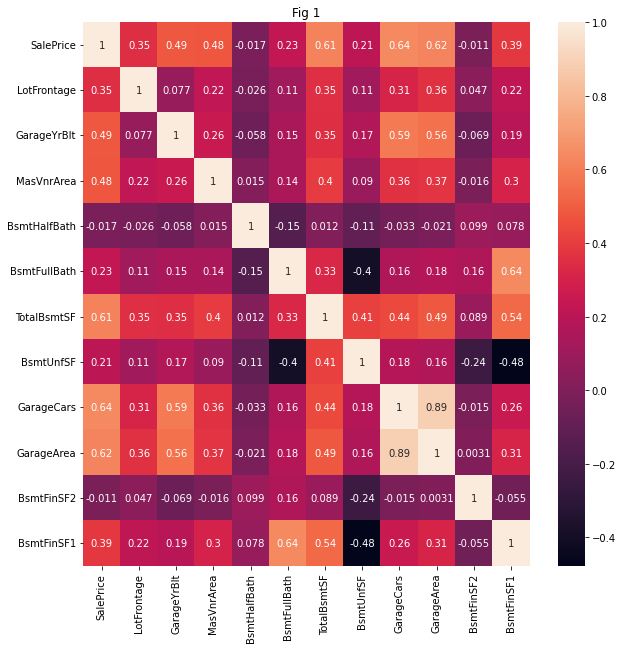

time: 1.57 s (started: 2022-10-23 20:40:48 +00:00)


In [ ]:
#correlation matrix for features containing missing values 
cols=[col for col in nan_values['Feature']]
corr=train[cols].corr()
plt.figure(figsize=(10,10))
plt.title('Fig 1')
sb.heatmap(corr,annot=True)

### Inference Fig 1: the above heat map shows that the numerical features that have high NaN values are not much correlated with the target variable, SalePrice. 


> Thus we can safely remove them from our train set 



In [ ]:
#dropping the variables with high NaN values with target
train.drop(['PoolQC','MiscFeature', 'Alley', 'Fence', 'FireplaceQu','LotFrontage','GarageType','GarageYrBlt',
'GarageFinish','MasVnrArea','Id'],axis=1,inplace=True)

time: 8.71 ms (started: 2022-10-23 20:40:56 +00:00)


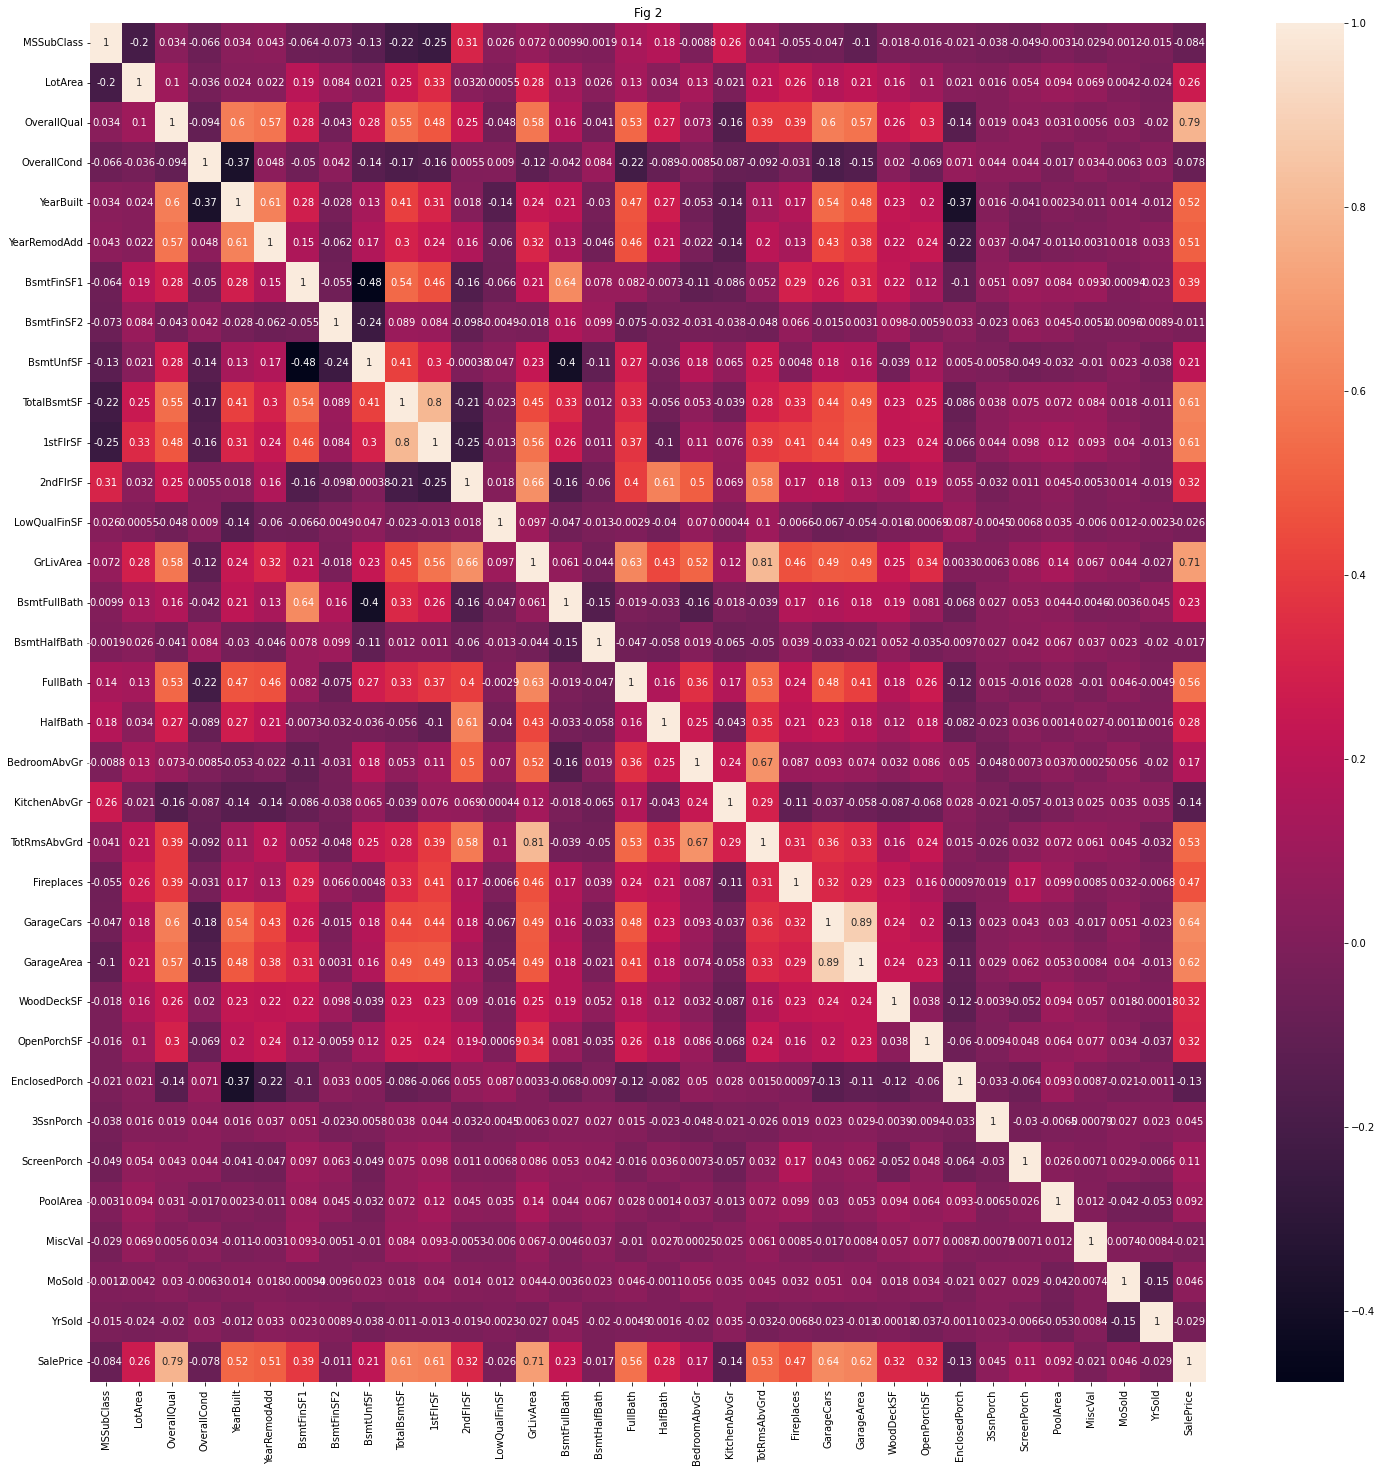

time: 12.2 s (started: 2022-10-22 14:59:24 +00:00)


In [ ]:
#heat map for correlation between variables
cor=train.corr()
plt.figure(figsize=(25,25))
plt.title('Fig 2')
sb.heatmap(cor,annot=True)


# Inference Fig 2: Fig 2 represents a heat map between all continous variables of the train data. 
corr() method determines the correlation between different variables including predictor and response variables.
It is used to determine Multicollinearity between variables, generally using the Pearson's coefficient. A strong negative or strong positive coeff can determine the type of relationship between those variables. 
Pearson's coeff > 0.7 between features depict multicollinearity.


  





The following features are instances of the same:
1.   enclosed porch and year built,
2.   bsmtunfSF and bsmtfinSF1
3.   1stflrSF and totalbsmtSF
4.   Garagearea and garagecars,
5.   bsmtfullbath and bsmtunfSF

Eventhough these variables account for multicollinearity in the data, I will not remove all those features, yet.








## NaN values imputation 


*   NaN values in Categorical features are filled by the mode ( max occuring value ) of the respective column
*   NaN values in numerical data is imputed by mean/median of the data


In [ ]:
#categorical values in the data
categorical_data=train.select_dtypes(include=['object'])


time: 9.72 ms (started: 2022-10-23 20:41:04 +00:00)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


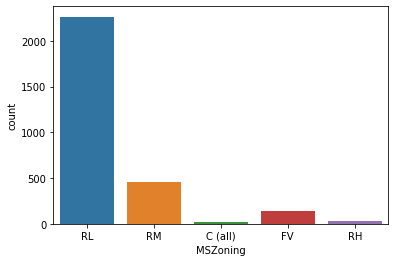

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


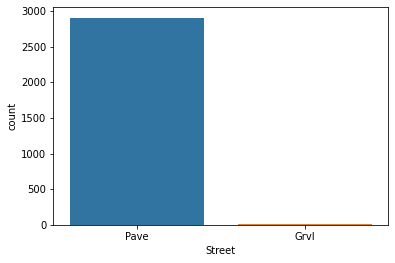

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


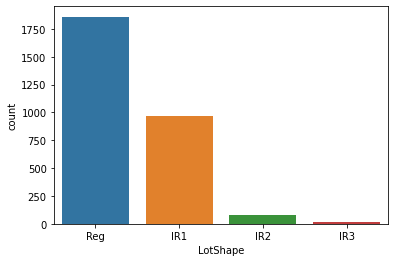

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


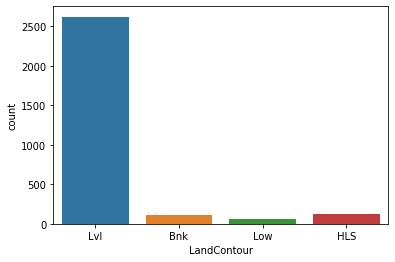

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


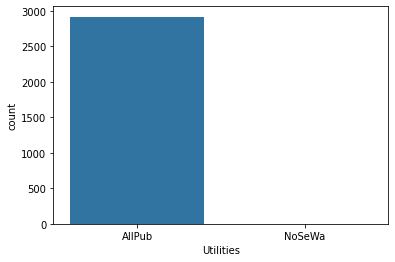

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


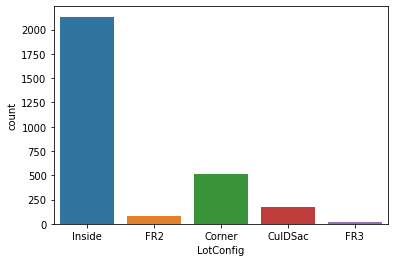

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


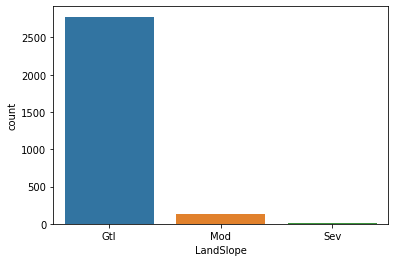

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


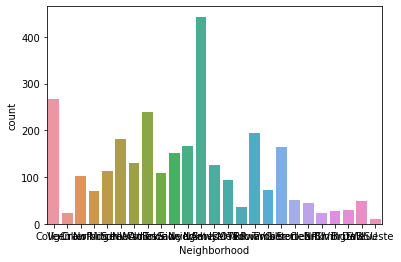

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


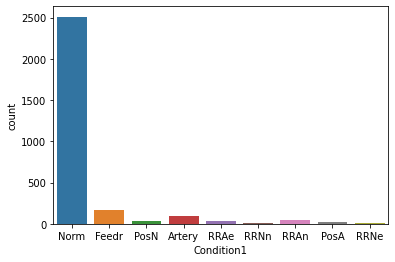

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


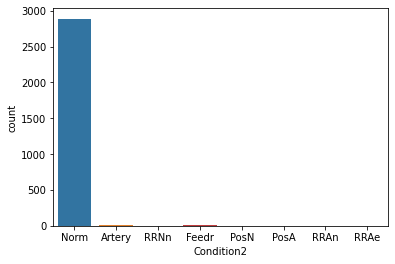

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


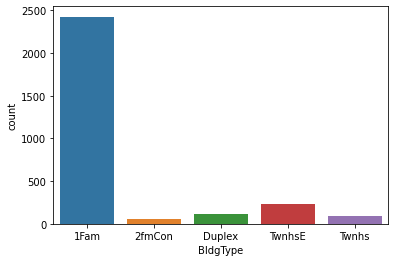

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


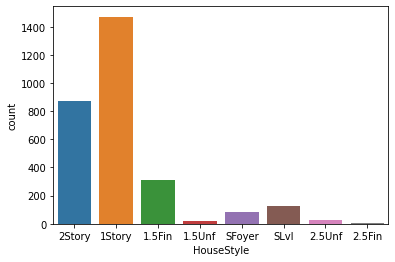

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


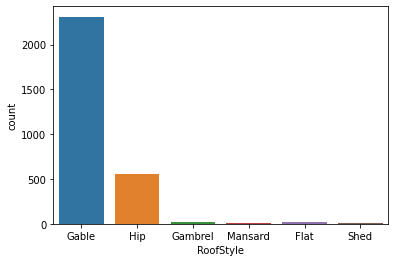

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


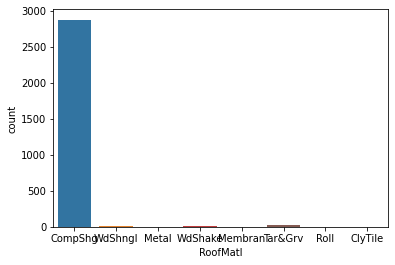

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


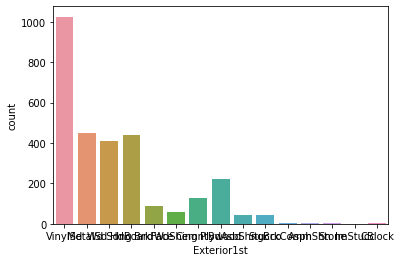

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


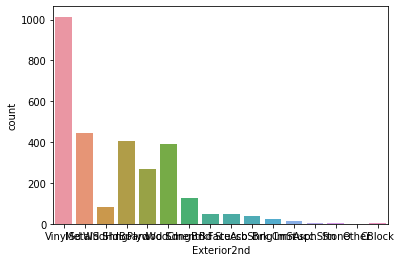

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


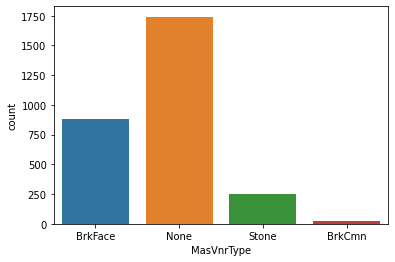

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


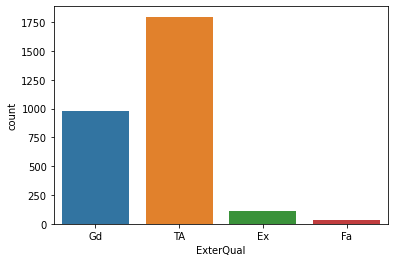

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


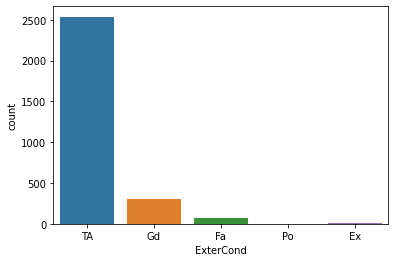

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


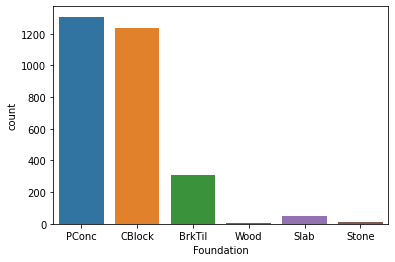

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


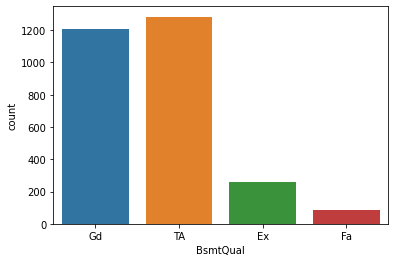

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


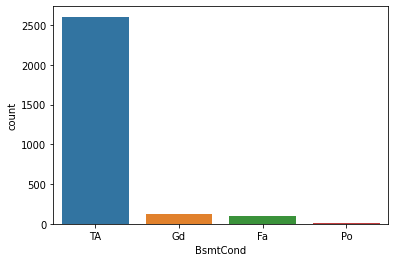

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


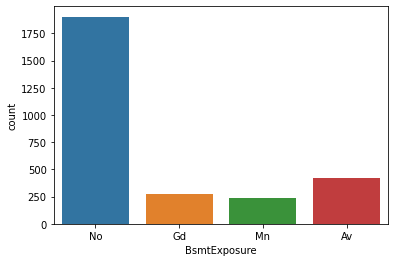

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


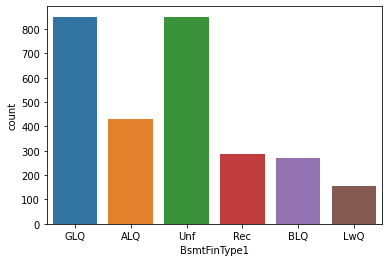

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


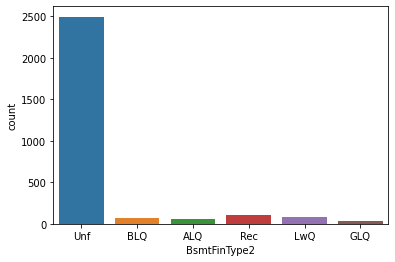

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


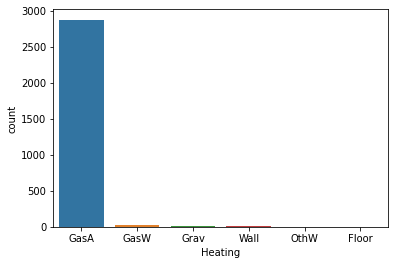

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


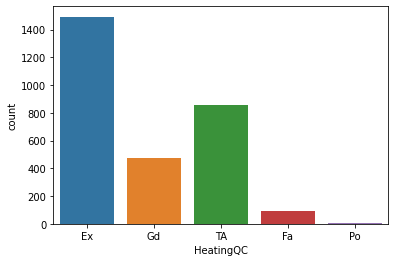

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


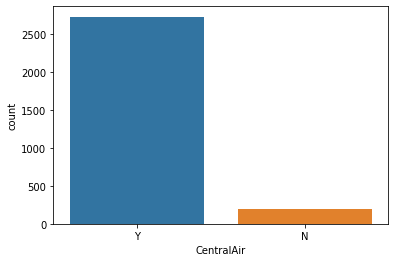

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


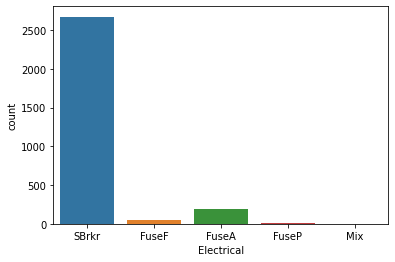

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


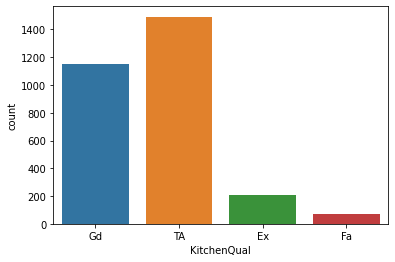

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


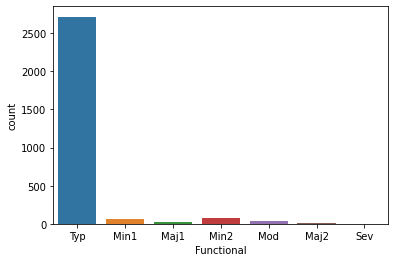

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


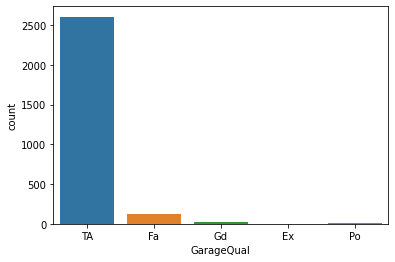

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


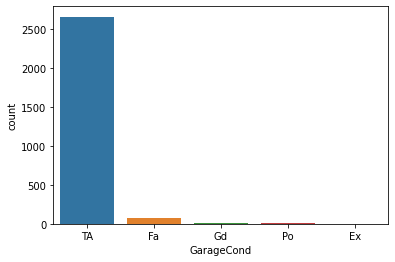

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


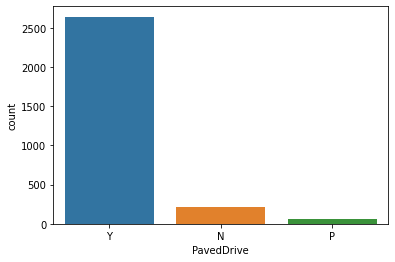

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


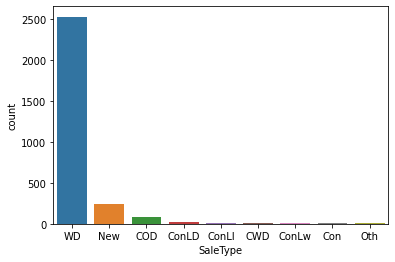

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


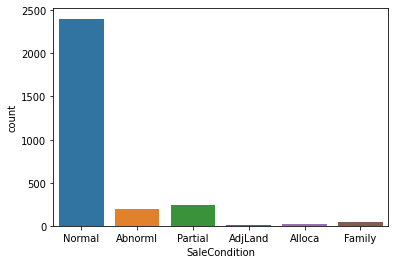

time: 5.34 s (started: 2022-10-23 20:41:14 +00:00)


In [ ]:
#value counts plot for each category
for i in categorical_data.columns:
  fig=sb.countplot(categorical_data[i])
  plt.show(fig)



### Inference: the above value count plots show that there are many categorical features that are imbalanced 

In [ ]:
#imputing NaN categories with the mode of each category respectively 

for i in categorical_data.columns:
  if train[i].isna().sum() >0:
    train[i].fillna(train[i].mode()[0],inplace=True)

time: 35.5 ms (started: 2022-10-23 20:41:19 +00:00)


In [ ]:
# Numerical values in the data
numerical_data = train.select_dtypes(include=['int64','float64'])


time: 3.08 ms (started: 2022-10-23 20:41:20 +00:00)


In [ ]:
#imputing NaN values with the mean or median of each numerical features respectively 
#(except SalePrice as it is the target variable and its  NaN values are simply a result of appending test to train data, will be dealt with later )

for i in numerical_data.columns[:20]:
  if train[i].isna().sum() >0:
    train[i].fillna(train[i].mean(),inplace=True)

for i in numerical_data.columns[20:33]:
  if train[i].isna().sum() >0:
    train[i].fillna(train[i].median(),inplace=True)

time: 17.5 ms (started: 2022-10-23 20:41:23 +00:00)


In [ ]:
#No NaN values left to be imputed
train.isna().sum()

MSSubClass          0
MSZoning            0
LotArea             0
Street              0
LotShape            0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice        1459
Length: 70, dtype: int64

time: 28.9 ms (started: 2022-10-23 20:41:27 +00:00)


In [ ]:
train.shape

(2919, 70)

time: 4.91 ms (started: 2022-10-23 20:41:30 +00:00)


#Detailed Report [V]

---





## V. Encoding categorical values for model training 

In order to train the model, appropriate type of data should be passed. Features with 'object' datatypes will have to be encoded to convert into numeric for the ML model to be trained.

Label encoding: replacing the categorical value with a numeric value between 0 and (n-1) classes

In [ ]:
#using LabelEncoder object to assign numeric labels to each category of features
labelencoder=LabelEncoder()
for i in categorical_data.columns:
    train[i]=labelencoder.fit_transform(train[i])

time: 60.3 ms (started: 2022-10-23 20:41:34 +00:00)


In [ ]:
#segregating train and test set as per original data handed out by kaggle
train_df=train[~train['SalePrice'].isnull()]

test_df=train[train['SalePrice'].isnull()]

time: 8.4 ms (started: 2022-10-23 20:41:34 +00:00)


In [ ]:
train_df.shape

(1460, 70)

time: 4.18 ms (started: 2022-10-23 20:41:36 +00:00)


In [ ]:
#transforming our target variable into its log
train_df['logSalePrice']=train_df['SalePrice'].apply(lambda x: np.log(x))

time: 9.53 ms (started: 2022-10-23 20:41:39 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [180]:
#dividing train set in to X and y

X=train_df.drop(['SalePrice','logSalePrice'],axis=1)
y=train_df.logSalePrice

time: 4.78 ms (started: 2022-10-23 21:11:36 +00:00)


In [181]:
print(X.shape)
print(y.shape)

(1460, 69)
(1460,)
time: 2.88 ms (started: 2022-10-23 21:11:39 +00:00)


# Detailed Report [VI]


---


## VI. VIF for feature selection
Variance Inflation Factor is another way to detect multicollinearity in the data. Here,each feature is picked and regressed against all of the other features. 

Generally, a VIF above 5 or 10 indicates high multicollinearity. 

Below is a function to compute VIF easily multiple times


In [ ]:
# compute the vif for all given features

def compute_vif(considered_features):

  """ 
  params: 
       considered_features: list of features to compute VIF

  Returs:
       vif : dataframe of feature name and its VIF 
  
  """
    
  x = X[considered_features]

  #calculation of VIF requires a constant
  x=add_constant(x)

  # create dataframe to store vif values
  vif = pd.DataFrame()
  vif["Feature"] = x.columns
  vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]


  return vif

      
       

time: 1.95 ms (started: 2022-10-23 20:41:47 +00:00)


Initially I passed all the columns to compute the VIF. 
Some features including, [ '1stFlrSF' , '2ndFlrSF', 'BsmtFinSF1' , 'BsmtUnfSF' ] had VIF = infinity thus they've been dropped because higher VIF value more the dependency.

In [182]:
#removing a few variables with infinity VIF
X_copy=X.drop(['1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtUnfSF'],axis=1)
#second iteration elimination
X_copy.drop(['GarageCars'],inplace=True,axis=1)
#third iteration elimination
X_copy.drop(['YearBuilt','TotRmsAbvGrd'],inplace=True,axis=1)

time: 9.61 ms (started: 2022-10-23 21:11:44 +00:00)


In [ ]:
compute_vif(X_copy.columns)

### Eliminating features iteratively is a better and safer option rather than removing them all at once because vif of features is calculated relatively. 

###After 3 trials I dropped 7 features with high ( > 5) VIF, until all other features' VIF was in decent range

In [ ]:
#dropping all features with VIF >5
X.drop(['1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtUnfSF','YearBuilt','TotRmsAbvGrd','GarageCars'],inplace=True, axis=1)

time: 15.1 ms (started: 2022-10-23 20:41:59 +00:00)


#Detailed Report [VII]




---
## VII. OLS Regression Results
 * https://towardsdatascience.com/understanding-the-ols-method-for-simple-linear-regression-e0a4e8f692cc

Here the our original train data is split into train set and (test)validation set in 75-25 ratio. This is a cross validation technique that helps stabilize the model results. A Model trained on certain data should be given unseen data to predict the results, the metrics of that model would convey how good or bad the model performance is. 




In [ ]:
#splitting the data into train and test set  in 75:25 ratio for prediction
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=42)

time: 6.39 ms (started: 2022-10-23 20:42:13 +00:00)


In [ ]:
print(X_train.shape)
print(X_test.shape)

(1095, 62)
(365, 62)
time: 2.97 ms (started: 2022-10-23 20:42:14 +00:00)


In [ ]:
# OLS model with intercept added to predictor
OLS_regressor = sm.OLS(y_train ,sm.add_constant(X_train)).fit()

time: 37.7 ms (started: 2022-10-23 18:06:47 +00:00)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
OLS_regressor.summary()

 ### Backward Elimination 
After performing feature selection using VIF, there were still some predictors whose p-values are higher than the 5% significance level, i.e 0.05. The features having p-value >0.05 reject the NULL hypothesis and are not significant enough to be added in the model.
Using OLS regression results, we can identify the features having high p-values and remove them accordingly.
In backward elimination we fit the model with all the features and iteratively drop the ones with high p-values until all the variables have p-values <0.05

In [ ]:
#backward elimination
drop_cols=[]
for cols in X_train.columns:
  if OLS_regressor.pvalues[cols] >0.05:
    drop_cols.append(cols)

time: 16.2 ms (started: 2022-10-23 20:42:21 +00:00)


In [ ]:
#dropping columns with p-value >0.05 from train and test sets (copies)
X_train_cpy=X_train
X_train_cpy=X_train_cpy.drop(drop_cols,axis=1)
X_train_cpy.shape

X_test_cpy=X_test
X_test_cpy=X_test_cpy.drop(drop_cols,axis=1)

time: 4.88 ms (started: 2022-10-23 20:42:21 +00:00)


In [ ]:
#fitting the OLS model on modified copies of train and test set to check all the p-values after dropping insignificant columns
OLS_regressor2=sm.OLS(y_train ,sm.add_constant(X_train_cpy)).fit()

time: 19.8 ms (started: 2022-10-23 18:32:59 +00:00)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
OLS_regressor2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logSalePrice   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     200.5
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:33:10   Log-Likelihood:                 594.31
No. Observations:                1095   AIC:                            -1115.
Df Residuals:                    1058   BIC:                            -929.7
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.8572      0.625     12.573      0.000       6.631       9.083
MSSubClass       -0.0007      0.000     -6.186      0.000      -0.001      -0.001
MSZoning         -0.0306      0.008     -3.918      0.000      -0.046      -0.015
LotArea        1.329e-06   4.91e-07      2.707      0.007    3.65e-07    2.29e-06
LotShape         -0.0082      0.003     -2.520      0.012      -0.015      -0.002
LandContour       0.0169      0.007      2.308      0.021       0.003       0.031
LandSlope         0.0435      0.021      2.086      0.037       0.003       0.084
Condition2       -0.0594      0.022     -2.694      0.007      -0.103      -0.016
OverallQual       0.0860      0.006     15.103      0.000       0.075       0.097
OverallCond       0.0244      0.005      5.282      0.000       0.015       0.033
YearRemodAdd      0.0015      0.000      4.633      0.000       0.001       0.002
RoofMatl          0.0175      0.008      2.231      0.026       0.002       0.033
Exterior1st      -0.0080      0.003     -3.067      0.002      -0.013      -0.003
Exterior2nd       0.0046      0.002      1.942      0.052   -4.88e-05       0.009
ExterCond         0.0176      0.006      2.811      0.005       0.005       0.030
Foundation        0.0228      0.007      3.062      0.002       0.008       0.037
BsmtQual         -0.0384      0.007     -5.438      0.000      -0.052      -0.025
BsmtCond          0.0168      0.007      2.503      0.012       0.004       0.030
BsmtExposure     -0.0141      0.004     -3.218      0.001      -0.023      -0.005
BsmtFinType1     -0.0106      0.003     -3.685      0.000      -0.016      -0.005
HeatingQC        -0.0069      0.003     -2.188      0.029      -0.013      -0.001
CentralAir        0.0999      0.020      4.966      0.000       0.060       0.139
GrLivArea         0.0002   1.69e-05     10.517      0.000       0.000       0.000
BsmtFullBath      0.0545      0.010      5.309      0.000       0.034       0.075
FullBath          0.0475      0.013      3.690      0.000       0.022       0.073
HalfBath          0.0155      0.011      1.432      0.153      -0.006       0.037
BedroomAbvGr      0.0238      0.007      3.240      0.001       0.009       0.038
KitchenAbvGr     -0.0366      0.025     -1.491      0.136      -0.085       0.012
KitchenQual      -0.0237      0.007     -3.390      0.001      -0.037      -0.010
Functional        0.0226      0.005      4.838      0.000       0.013       0.032
Fireplaces        0.0496      0.008      5.883      0.000       0.033       0.066
GarageArea        0.0002   2.79e-05      8.264      0.000       0.000       0.000
PavedDrive        0.0248      0.010      2.453      0.014       0.005       0.045
WoodDeckSF        0.0001   3.69e-05      3.171      0.002    4.46e-05       0.000
ScreenPorch       0.0003   8.06e-05      3.528   

time: 88.4 ms (started: 2022-10-23 18:33:10 +00:00)


### I applied VIF on 69 features, from which I removed 7 with high VIF values (>5). On the remaining 62 features, I fit the OLS model to analyse the p-values and coefficients. Using backward elimination, i dropped 26 columns with p-value greater than the 5% significance level. Finally, the linear regression model will be trained on 36 significant features.

In [ ]:
#drop all features with high p-value
X_train.drop(drop_cols,inplace=True,axis=1)
X_test.drop(drop_cols,inplace=True,axis=1)
print(X_train.shape)

(1095, 36)
time: 8.94 ms (started: 2022-10-23 20:42:38 +00:00)


# Detailed Report [VIII]

---


##  VIII. Fitting the linear regression model
After analysing the results from applying both VIF and backward elimination, I have fit the linear regression model on 36 significant columns from the data.



In [ ]:
#Making predictions using the Linear regression model using VIF filterted features (62 columns)
lr=LinearRegression()
lr.fit(X_train, y_train) 
y_pred = lr.predict(X_test)

time: 18.7 ms (started: 2022-10-23 20:42:45 +00:00)


Text(0, 0.5, 'predicted Sale price')

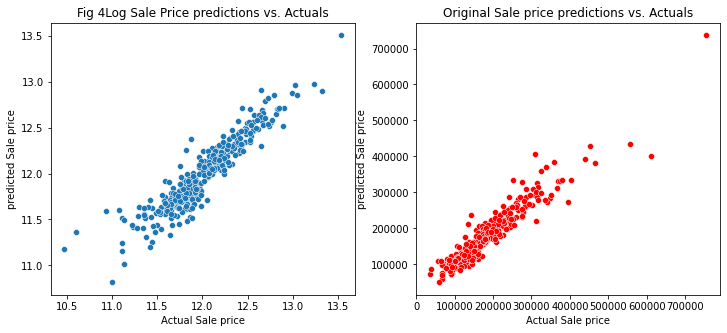

time: 741 ms (started: 2022-10-23 19:50:11 +00:00)


In [ ]:
#visualizing the linear regression results
fig = plt.figure(figsize=(12,5))
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[0, 1])

sb.scatterplot(x = y_test, y = y_pred, ax=ax1)
ax1.set_title("Fig 4 Log Sale Price predictions vs. Actuals")
ax1.set_xlabel('Actual Sale price')
ax1.set_ylabel('predicted Sale price')

sb.scatterplot(x = np.exp(y_test), y = np.exp(y_pred), ax=ax2,color='red')
ax2.set_title("Original Sale price predictions vs. Actuals")
ax2.set_xlabel('Actual Sale price')
ax2.set_ylabel('predicted Sale price')


### From the scatter plot between actual values and predicted values, it is evident that our linear regression model fits the data pretty closely leaving only a few outliers 

# Detailed Report [IX]

---



## IX. Computing RMSE score

Root Mean Square Error (RMSE) is a standard way to measure the error of a regression model in predicting continous data.
If the predicted responses are very close to the true responses the RMSE will be small.

### RMSE of log transformed test data and predicted data is calculated

In [ ]:
#computing the mean squared error for our trained model
mse = mean_squared_error(y_test, y_pred)
print('Root Mean squared error with feature selection: {}'.format(math.sqrt(mse)))
print('Mean squared error with feature selection: {}'.format(mse))
print('R2 score of the linear regression model {}'.format(r2_score(y_test, y_pred)))

Root Mean squared error with feature selection: 0.15186405664561786
Mean squared error with feature selection: 0.023062691700863433
R2 score of the linear regression model 0.8668123671326645
time: 8.1 ms (started: 2022-10-23 20:43:01 +00:00)


# Detailed Report [ X ]


---







## X. Interpretations
The linear regression model has been trained on 36 significant features out of the total 80 features given in the original train data. I have attempted to remove multicollinearity and non-significant features (p-value >0.05) from the dataset, essentially meaning, each of the predictors used impact the target variable significantly. For instance, the value of overall quality of the house
influences the sale price, in a way that, a unit change in overall quality increases the  log sale price by 0.086 (its coefficient), while others are to remain constant. This relationship between some important predictors is also visualized in figure 3 (pairplot). Figure 4 (scatter plot) represents how well the model has fit the data.
After training the model, it has been tested on validation set of the same dimensions. After evauation,the model achieved a final MSE score of 0.023 and R2 score of 0.86. 

# Detailed Report [XI]


---



##  XI. Final Kaggle Submission
Making final predictions on the test set provided by kaggle. 
All the transformations and modifications have already been made on this data along with the orignal test data

In [ ]:
test_df.shape

(1459, 70)

time: 4.73 ms (started: 2022-10-23 20:43:09 +00:00)


In [ ]:
#Similarly modifying it as train data
test_df.drop(['1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtUnfSF','YearBuilt','TotRmsAbvGrd','GarageCars','SalePrice'],inplace=True, axis=1)

time: 8.15 ms (started: 2022-10-23 20:43:11 +00:00)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
test_df.drop(drop_cols,axis=1,inplace=True)

time: 4.39 ms (started: 2022-10-23 20:43:13 +00:00)


In [ ]:
final_pred=np.exp(lr.predict(test_df))
#Creating a dataframe for predicted sale prices for corresponding Ids
final_df=pd.DataFrame(columns=['Id','SalePrice'])

time: 18.1 ms (started: 2022-10-23 20:43:16 +00:00)


In [ ]:
final_df['Id']=test_Id
final_df['SalePrice']=final_pred

time: 4.51 ms (started: 2022-10-23 20:43:18 +00:00)


In [ ]:
#Creating a CSV for final submission
final_df.to_csv('final_submission6.csv',index=False)

time: 10.7 ms (started: 2022-10-23 20:43:23 +00:00)


### Screenshot of submissions

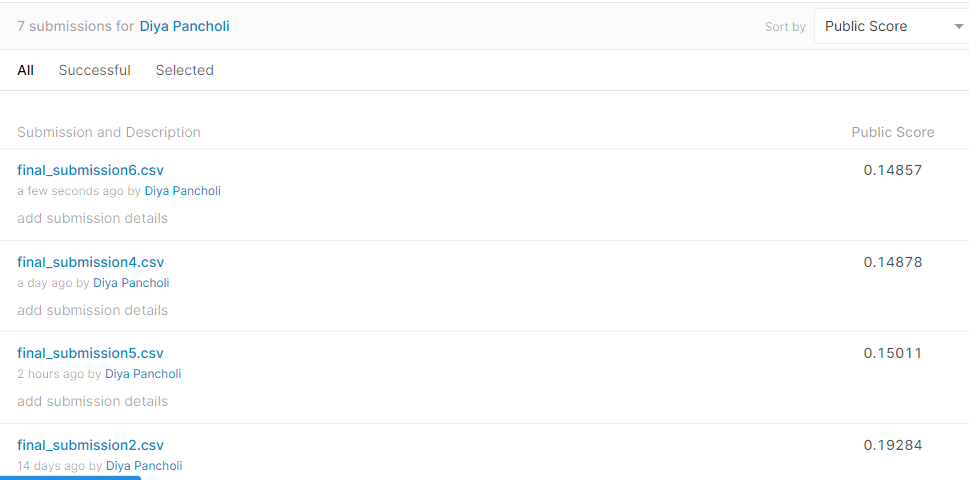

# XI. References

---



*   https://towardsdatascience.com/predicting-house-prices-with-linear-regression-machine-learning-from-scratch-part-ii-47a0238aeac1
*   https://github.com/mcnica89/ISL-python/blob/master/labs/lab_03.6_linear_regression.ipynb

*   https://towardsdatascience.com/targeting-multicollinearity-with-python-3bd3b4088d0b
*   https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/   
* https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/
* https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

